In [48]:
import numpy as np
import bilby
import gwpy
import corner
import matplotlib.pyplot as plt
%matplotlib inline

C = 299792458.
G = 6.67408*1e-11
Mo = 1.989*1e30
Mpc = 3.086*1e22

In [49]:
from gwpy.table import EventTable

events = EventTable.read('GW170817_GWTC-1.hdf5')

In [50]:
events

<EventTable length=4041>
    costheta_jn     luminosity_distance_Mpc ...       costilt2      
      float64               float64         ...       float64       
------------------- ----------------------- ... --------------------
-0.9949156704387463        45.2525741806888 ...  0.17566033741788467
-0.9863518475402834       45.87228628695016 ...   0.9394503714939222
-0.8052996943978159       37.41904077343804 ...  0.42972335547163215
 -0.994374886506084       47.55007238192025 ... -0.38564075583512214
-0.9725586534156178       46.39669306630466 ... -0.34981088949902317
-0.5428577407672485      25.364608050856607 ...   0.9200459157034669
-0.9573922112539452      43.481754514381905 ...  -0.8461578084758759
                ...                     ... ...                  ...
-0.9401028381724849       43.84478402401347 ... -0.08474508519315607
-0.7857983174163744       37.63322714580635 ...   0.4881010474482694
-0.9552991305354872      46.594195978452404 ...   0.1002192337489521
-0.5724114414953205      27.509285593203625 ...  0.14568240522467824
  -0.96760148930713       44.95172601144537 ...  -0.2694345968566518
-0.8212594792156147      38.931113294665025 ...   0.8527182263655468
-0.7262541481794014       36.05560553935165 ...   0.2322420634488444
-0.8665762471687574       43.41459845184866 ... -0.07635076331094513

In [57]:
m1 = np.array(events['m1_detector_frame_Msun'])
m2 = np.array(events['m2_detector_frame_Msun'])
chirpM = ( (m1*m2)**(3/5) )/( (m1+m2)**(1/5) )
q = m2/m1

data = np.transpose(np.array([chirpM,q]))

In [58]:
figure = corner.corner(data, labels=[r"$M$", r"$q$"],
                       quantiles=[0.05, 0.5, 0.95],
                       show_titles=True, title_kwargs={"fontsize": 12})

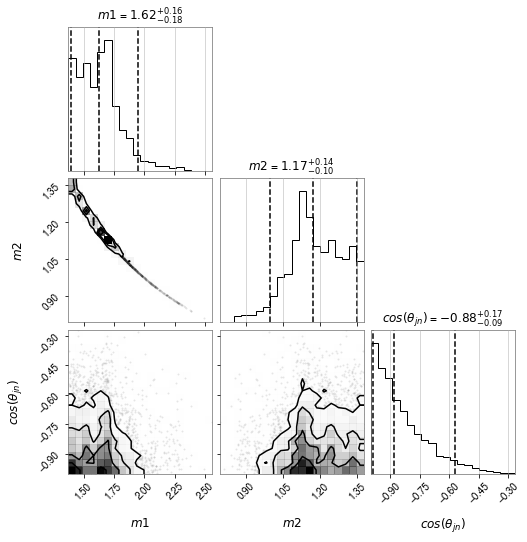

In [59]:
costheta_jn = np.cos(np.arccos(np.array(events['costheta_jn'])))
data = np.transpose(np.array([m1, m2,costheta_jn]))
figure = corner.corner(data, labels=[r"$m1$", r"$m2$", r"$cos(\theta_{jn})$"],
                       quantiles=[0.05, 0.5, 0.95],
                       show_titles=True, title_kwargs={"fontsize": 12})